<a href="https://colab.research.google.com/github/Sambhaji6529/Linear-Regression_Project/blob/main/Household_Electric_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import the necessary library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#**Load dataset**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt",delimiter=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# **Dataset information**

In [3]:
df.shape

(2075259, 9)

In [4]:
df.size

18677331

In [5]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# **Drop  Unwanted Columns**

In [7]:
df.drop(["Date","Time"],axis=1,inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
df.shape

(2075259, 7)

# **Data Cleaning**

**to_numeric() to Convert Object to Float**


*   the to_numeric() function to convert the points column in the DataFrame from an object to a float:



In [9]:
#To Convert object to float
df['Global_active_power']=pd.to_numeric(df['Global_active_power'], errors='coerce')

In [10]:
df['Global_reactive_power']=pd.to_numeric(df['Global_reactive_power'], errors='coerce')

In [11]:
df['Voltage']=pd.to_numeric(df['Voltage'], errors='coerce')

In [12]:
df['Global_intensity']=pd.to_numeric(df['Global_intensity'], errors='coerce')

In [13]:
df['Sub_metering_1']=pd.to_numeric(df['Sub_metering_1'],errors='coerce')

In [14]:
df['Sub_metering_2']=pd.to_numeric(df['Sub_metering_2'],errors='coerce')

In [15]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

# **Summary of statistics**

In [16]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [17]:
#checking the missing values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

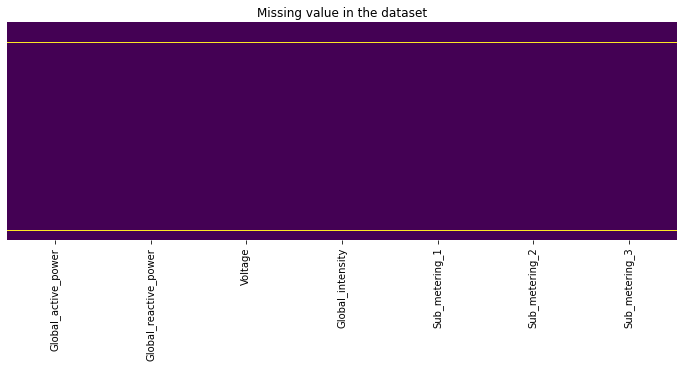

In [18]:
#Check for missing value¶
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [19]:
#using for loop to fill missing value median 
for i in df.describe().columns:
  df[i].replace(np.nan,df[i].median(),inplace=True)


In [20]:
#checking the missing values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

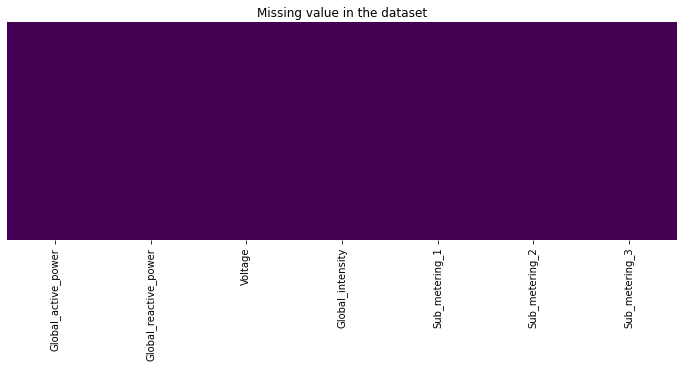

In [21]:
#Check for missing value¶
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [83]:
df['Global_reactive_power'].value_counts()

0.000    481561
0.100     47881
0.092     21841
0.098     21812
0.096     21792
          ...  
1.222         1
1.156         1
1.088         1
1.084         1
1.026         1
Name: Global_reactive_power, Length: 532, dtype: int64

In [22]:
# Target Variable
eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


# **EXploratory Data Analysis**

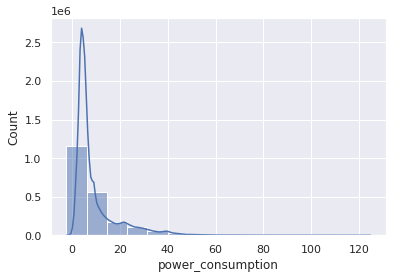

In [23]:
# Apply the default theme
sns.set_theme()

# Distribution of the target variables
sns.histplot(data=df, x='power_consumption', bins=15, kde=True)
plt.show()

In [24]:
## Correlation
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Global_active_power,1.000000,0.247835,-0.399523,0.998891,0.484707,0.435142,0.639772,0.700607
Global_reactive_power,0.247835,1.000000,-0.112351,0.266900,0.123531,0.139736,0.091057,0.211642
Voltage,-0.399523,-0.112351,1.000000,-0.411121,-0.196051,-0.167496,-0.267892,-0.271384
Global_intensity,0.998891,0.266900,-0.411121,1.000000,0.489600,0.440909,0.627776,0.702507
Sub_metering_1,0.484707,0.123531,-0.196051,0.489600,1.000000,0.055201,0.103755,0.125108
Sub_metering_2,0.435142,0.139736,-0.167496,0.440909,0.055201,1.000000,0.082437,0.085256
Sub_metering_3,0.639772,0.091057,-0.267892,0.627776,0.103755,0.082437,1.000000,0.178494
power_consumption,0.700607,0.211642,-0.271384,0.702507,0.125108,0.085256,0.178494,1.000000


In [34]:
X=df.drop('power_consumption',axis=1)
y=df['power_consumption']
#Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
     

In [36]:
X_train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
216296,0.864,0.064,234.89,3.8,0.0,0.0,0.0
34722,3.946,0.458,236.48,16.8,39.0,3.0,0.0
1650837,0.352,0.076,245.54,1.6,0.0,1.0,1.0
523569,0.860,0.000,243.13,3.4,0.0,0.0,0.0
1041133,0.490,0.070,241.11,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
259178,0.306,0.256,241.69,1.6,0.0,1.0,0.0
1414414,3.786,0.230,241.14,15.6,38.0,0.0,12.0
131932,2.116,0.232,239.67,10.0,9.0,0.0,0.0
671155,2.012,0.258,235.99,8.6,0.0,3.0,0.0


In [39]:
X_test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1870606,0.256,0.106,242.00,1.2,0.0,0.0,1.0
213926,0.466,0.352,237.22,2.4,0.0,2.0,0.0
409006,0.758,0.194,238.66,3.2,0.0,1.0,0.0
265806,1.290,0.046,240.64,5.4,1.0,0.0,18.0
1786279,0.428,0.202,242.23,1.8,0.0,2.0,1.0
...,...,...,...,...,...,...,...
686876,0.588,0.200,240.94,2.6,0.0,1.0,1.0
183452,1.530,0.188,240.36,6.4,0.0,0.0,17.0
373647,0.186,0.068,241.92,1.0,0.0,0.0,0.0
477208,0.228,0.000,241.42,1.0,0.0,0.0,0.0


# **Model Training**

In [49]:
from sklearn.linear_model import LinearRegression
     

regression=LinearRegression()
     

regression.fit(X_train,y_train)
     

LinearRegression()

In [50]:
#print the cofficients and the intercept
print(regression.coef_)

[ 1.66666667e+01 -7.83817455e-14  6.93889390e-16 -7.32747196e-15
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00]


In [51]:
print(regression.intercept_)

-1.652011860642233e-13


In [52]:
#on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [53]:
#prediction with test data
reg_pred=regression.predict(X_test)

In [54]:
reg_pred

array([ 3.26666667,  5.76666667, 11.63333333, ...,  3.1       ,
        3.8       ,  5.4       ])

# **Assumptions**

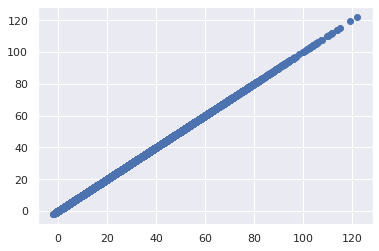

In [55]:
#plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)
     

In [56]:
#residuals
residuals=y_test-reg_pred

In [57]:
residuals

1870606    6.217249e-15
213926     3.286260e-14
409006     1.598721e-14
265806     1.776357e-15
1786279    1.509903e-14
               ...     
686876     1.776357e-14
183452     1.243450e-14
373647     4.884981e-15
477208    -1.776357e-15
67365      8.881784e-15
Name: power_consumption, Length: 622578, dtype: float64

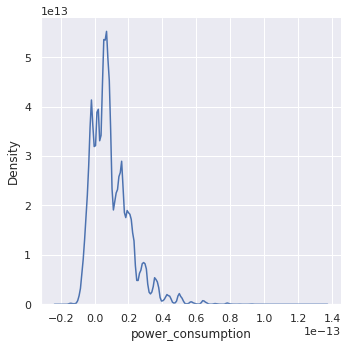

In [58]:
#plot this residuals
sns.displot(residuals,kind="kde")

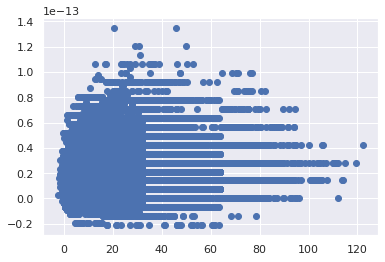

In [59]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

# **MultiColineartiy**

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [45]:
pd.DataFrame({'vif': vif}, index=df.columns[0:7])

,vif
Global_active_power,1274.847401
Global_reactive_power,2.900949
Voltage,3.068549
Global_intensity,1280.576147
Sub_metering_1,1.662354
Sub_metering_2,1.571084
Sub_metering_3,3.623645


<Axes: >

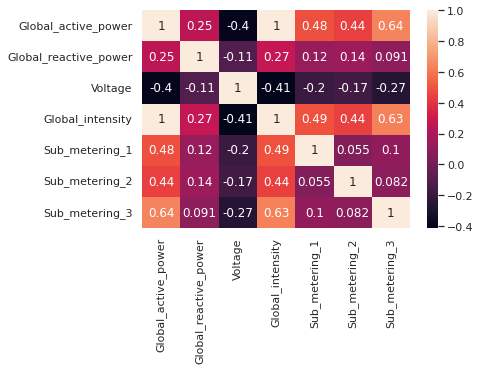

In [46]:
# Another Technique
sns.heatmap(df.iloc[:,0:7].corr(),annot=True)

**Drop Vif values**

In [47]:
X = X.drop(['Global_active_power', 'Global_intensity'], axis=1)

df = pd.DataFrame()
df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df['Column'] = X.columns
df.sort_values('VIF', ascending=False)

,VIF,Column
1,2.631692,Voltage
0,2.296359,Global_reactive_power
4,1.605795,Sub_metering_3
3,1.076402,Sub_metering_2
2,1.059281,Sub_metering_1


Now we have all variables with VIF values are less than 5. With that variables, now we can interpret the result. 

# **MSE MAE**

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1.0822715570903544e-14
2.249231832536999e-28
1.4997439223204072e-14


# **R square and adjusted R square Formula**

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [61]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)
     

1.0


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [62]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
     

1.0